# Resolvendo Equações Não-lineares (Achando raízes)

Nosso problema aqui é resolver equações da forma $$f(x) = 0, $$ isto é, achar uma solução (raiz) $\bar{x}$ tal que $f(\bar{x})=0$ (note que podemos ter mais de uma solução). A hipótese mínima que pediremos de $f$ é que ela seja contínua no intervalo considerado. Nesse caso, as vezes é importante fazermos uma análise inicial para localizar possíveis intervalos que contém a solução (raiz).

Por exemplo, considerando da função $f(x) = x^3 - 12x + 5$, calculando sua derivada, achando os pontos críticos e os intervalos de crescimento e descrescimento, podemos chegar a conclusão que as estão em $[-4,-3]$, $[0,1]$ e $[3,4]$.

Outra opção interessante é transformar o problema $f(x)=0$, em $F(x) = G(x)$, e encontrar os pontos onde os gráficos de $F$ e $G$ (possivelmente mais simples de se esboçar) se cruzam. No exemplo anterior podemos tomar $F(x) = x^3$ e $G(x) = 12x-5$.

## Método da Bissecção 

A ideia é construir uma sequência de pontos $x_0$, $x_1$, $x_2$, $\ldots$ de tal forma que $\lim_{k \to \infty} x_k = \bar{x}$, onde $\bar{x}$ é uma solução de $f(x) = 0$. Uma explicação das etapas utilizadas na construção da sequência é a seguinte:

- **Passo 0**: Para começar, é necessário encontrar $a_0$ e $b_0$ de modo que $f(a_0)f(b_0) < 0$. Os dois pontos são rotulados de modo que $a_0 < b_0$. Com isso, você considera $x_0$ como o ponto médio do intervalo. Então, $x_0 = (a_0 + b_0)/2$. (Achar $a_0$ e $b_0$ é na inspeção, a garantia da existência da raiz vem do TVI).

- **Passo 1**: Se $f(x_0) \neq 0$, então determine qual metade do intervalo contém uma solução. Portanto, se $f(a_0)f(x_0) < 0$, então o novo intervalo contendo a raiz é $a_1 = a_0$ e $b_1 = x_0$. Caso contrário, considere $a_1 = x_0$ e $b_1 = b_0$. Com isso, tome $x_1 = (b_1 + a_1)/2$.

- **Passo 2**: Se $f(x_1) \neq 0$, basta refazer o procedimento de subdivisão usado no **passo 1**.

- Os próximos passos repetem o procedimento acima.

Consideremos como ilustração o exemplo $f(x) = (x - 0.1)(x - 2.1)(x + 1.1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = lambda x:  (x - 0.1)*(x - 2.1)*(x + 1.1)

nplot = 200
a = -2
b = 3
 
x = np.linspace(a,b,nplot)
y = f(x)

plt.plot(x,y)
plt.xticks(np.arange(a, b+1, 1.0))
plt.xlim(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Porém ainda não falamos como interromper o procedimento acima. Para isso precisamos de um **critério de parada**. Podemos usar o erro entre iterações sucessivas $|x_k - x_{k-1}|$ ou o erro **relativo** entre iterações sucessivas $\dfrac{|x_k - x_{k-1}|}{|x_k|}$ (assumindo $x_k \neq 0$), ou ainda verificar se $|f(x_k)|$ é pequeno. Em termos de pseudo-código temos


**Entrada**: $a < b$ com $f(a)f(b) < 0$ e $eps_1 > 0$ (tolerância erro iterativo) e $eps_2 > 0$ (tolerância da raiz).

**Inicialização:** $x = (a + b)/2$, $err_1 = 10*eps_1$

**Iteração:**
    
    
    while err_1 > eps_1 or |f(x)| > eps_2
        if f(a)f(x) < 0, then b = x 
            else if f(b)f(x) < 0, then a = x 
            else stop 
        end 
        X = x 
        x = (a + b)/2
        f(x)
        err_1 = |x − X|/|x| 
    fim

In [ ]:
def bisection(f, a, b, eps1=1e-4, eps2=1e-4, debug=False):
    
    f_a = f(a)
    f_b = f(b)
    x_M = (a + b)/2.0
    f_M = f(x_M)
    
    err1 = 10.*eps1
    iteration_counter = 1

    while ((err1 > eps1) and (abs(f_M) > eps2)):
        
        if debug:
            print('Erro rel. iteração {:2d} = {:.8e},  |f(x_M)| = {:.8e}'.format(iteration_counter,err1,abs(f_M)))
            
        if f_a*f_M < 0:
            b = x_M
            f_b = f_M
        else:
            a = x_M
            f_a = f_M
        
        Xprev   = x_M    
        x_M = (a + b)/2
        f_M = f(x_M)
        err1 = abs((x_M - Xprev)/x_M)
        iteration_counter = iteration_counter + 1
    
    if debug:
            print('Erro rel. iteração {:2d} = {:.8e},  |f(x_M)| = {:.8e}'.format(iteration_counter,err1,abs(f_M)))
            
    return x_M, iteration_counter

In [ ]:
sol, count = bisection(f,-1.5,2.5,eps1=1e-5,eps2=1e-10,debug=True)

In [ ]:
print('Solução: {:g}'.format(sol))
print('Número de Iterações: {:d}'.format(count))

In [ ]:
raiz = 2.1
erro = abs(sol - raiz)
erro_rel = erro/abs(raiz)
print('Erro absoluto = {:.6e}'.format(erro))
print('Erro relativo = {:.6e}'.format(erro_rel))

<div class="alert alert-block alert-info">
Tanto o erro (absoluto) quanto o erro relativo são usados, mas o erro relativo tem a vantagem de ser baseado em um valor <b>normalizado</b>. Para explicar, considere o requisito de que a solução computada satisfaça $|x_{ex} − x_{ap}| < 0.1$ versus satisfazendo $|x_{ex} − x_{ap}|/|x_{ex}| < 0.1$. Se $x_{ex} = 10^{−8}$, então usando o erro (absoluto) você aceitaria $x_{ap} = 10^{−2}$, mesmo que este seja um fator $10^6$ maior que a solução. Com o erro relativo, você não aceitaria $x_{ap} = 10^{−2}$, mas aceitaria qualquer valor que satisfizesse $0.9 < |x_{ap}/x_{ex}| < 1.1$.
    
O outro aspecto útil do erro relativo é que ele tem uma conexão com o número de dígitos significativos corretos, e isso será explicado mais tarde.
</div>

### Convergência do Método

**Teorema**

Se $f \in C[a_0, b_0]$, com $f(a_0)f(b_0) < 0$, então os pontos médios $x_0, x_1, x_2, \ldots$ calculados usando o método da bissecção convergem para uma solução $\bar{x}$ de $f(x) = 0$. Além disso, o erro satisfaz
$$
|x_k - \bar{x}| \leq \dfrac{1}{2^{k+1}} (b_0 - a_0),
$$
e o erro da iteração é 
$$
|x_k - x_{k-1}| = \dfrac{1}{2^{k+1}} (b_0 - a_0).
$$

**Ou seja, o método da bissecção nos permite saber o número de iterações necessárias para atingirmos uma determinada tolerância.** 

### Ordem de Convergência (Definição)

Suponha que a sequência $\{x_k\}$ seja convergente, isto é, $\lim_{k \to \infty} x_k= \bar{x}$, e seja $e_k$ o erro da aproximação, isto é, $e_k = |x_k - \bar{x}|$. Uma vez que $x_k$ está numa vizinhança de $\bar{x}$ (ou seja, está próximo de $\bar{x}$), se $$e_k \approx C e_{k-1}^r \quad (\star),$$ onde $C > 0$ é uma constante, então dizemos que a **ordem de convergência** é $r$.

<div class="alert alert-block alert-info">
É possível provar (veja se consegue argumentar isso) que se a ordem de convergência é $r$, e $\bar{x} \neq 0$, então o erro relativo $\dfrac{|x_k - \bar{x}|}{|\bar{x}|}$ e o erro relativo da iteração $\dfrac{|x_k - x_{k-1}|}{|x_k|}$ também satisfaz $(\star)$, porém tipicamente com uma constante $C$ diferente em cada caso.
</div>

O método da bissecção satisfaz $e_k \approx \dfrac{1}{2} e_{k-1}$, portanto ele é um método de primeira ordem pois tem $r = 1$. Veremos em seguida dois outro método com taxas melhores, por exemplo o método de Newton é de segunda ordem, ou seja, $r=2$ (também dito, ordem de convergência quadrática).

Faça o seguinte exercício. Suponha $C=1/2$, se $e_1 = 10^{-1}$, e calcule $e_4$ (aproximadamente) para ambos métodos, ou seja, com $r=1$ e $r=2$.

## Método de Newton

Dado $x_0$, consideremos as iterações
$$
x_k = x_{k-1} - \dfrac{f(x_{k-1})}{f'(x_{k-1})},
$$
para $k = 1, 2, 3, \ldots$.

In [2]:
def naive_Newton(f, dfdx, x, eps, debug=False): 
    while abs(f(x)) > eps: 
        x = x - (f(x))/dfdx(x)
        if debug:
            print(x)
    return x

In [3]:
# Usando o pacote simbólico do Python para definir a função 
# e calcular sua derivada de maneira simbólica e transformar
# numa função numérica

import sympy as sym

x = sym.symbols('x') 

f_expr = (x - 0.1)*(x - 2.1)*(x + 1.1) # symbolic expression for f(x) 
dfdx_expr = sym.diff(f_expr, x) # compute f’(x) symbolically 

print(f_expr)
print(dfdx_expr)

# turn f_expr and dfdx_expr into plain Python functions 
f = sym.lambdify([x], # argument to f 
                 f_expr) # symbolic expression to be evaluated 

dfdx = sym.lambdify([x], dfdx_expr) 

(x - 2.1)*(x - 0.1)*(x + 1.1)
(x - 2.1)*(x - 0.1) + (x - 2.1)*(x + 1.1) + (x - 0.1)*(x + 1.1)


In [7]:
print(f(3), dfdx(3))
print(sym.expand(f_expr))
print(sym.expand(dfdx_expr))

10.700999999999999 18.189999999999998
x**3 - 1.1*x**2 - 2.21*x + 0.231
3*x**2 - 2.2*x - 2.21


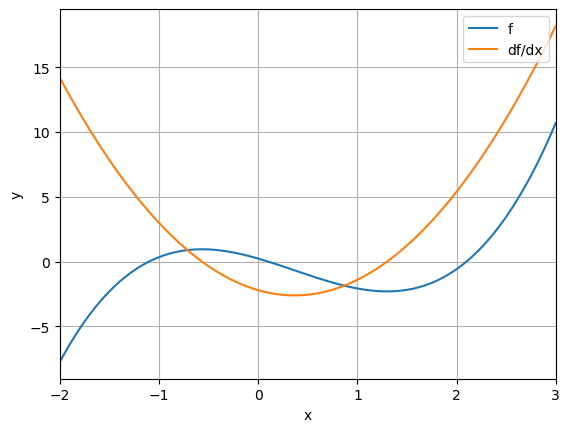

In [8]:
nplot = 200
a = -2
b = 3
 
x = np.linspace(a,b,nplot)
y = f(x)
dy = dfdx(x)

plt.plot(x,y,label='f')
plt.plot(x,dy,label='df/dx')
plt.legend(loc='upper right')
plt.xticks(np.arange(a, b+1, 1.0))
plt.xlim(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [9]:
# Testando o Naive Newton para a função definida acima (a mesma
# do método da bissecção

x0 = 3.0
solApprox = naive_Newton(f, dfdx, x0, 1.0e-4, debug=True)
print(solApprox)

2.4117097306212205
2.156962173183982
2.1024623945180805
2.1000049115007156
2.1000049115007156


In [22]:
#x0 = -0.4
x0 = -0.447
#x0 = -0.6
solApprox = naive_Newton(f, dfdx, x0, 1.0e-4,debug=True)
print(solApprox)

1.0035813818515786
-0.4888968252407817
1.7433937951215295
2.285685968916457
2.122774942191575
2.1004098653050622
2.1000001364221688
2.1000001364221688


### Problema a vista!!! O Método de Newton pode falhar.

In [23]:
x = sym.symbols('x')

f_expr = sym.tanh(x)
dfdx_expr = sym.diff(f_expr, x)

print(f_expr)
print(dfdx_expr)

f = sym.lambdify([x], f_expr) 
dfdx = sym.lambdify([x], dfdx_expr)

tanh(x)
1 - tanh(x)**2


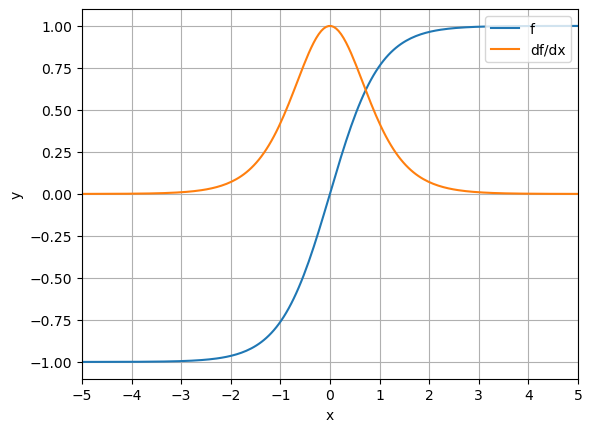

In [24]:
import numpy as np
import matplotlib.pyplot as plt

nplot = 200
a = -5
b = 5
 
x = np.linspace(a,b,nplot)
y = f(x)
dy = dfdx(x)

plt.plot(x,y,label='f')
plt.plot(x,dy,label='df/dx')
plt.legend(loc='upper right')
plt.xticks(np.arange(a, b+1, 1.0))
plt.xlim(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [32]:
# Para quais x0´s abaixo o método de Newton falha?

#x0 = 1.07
#x0 = 1.08
x0 = 1.09

solApprox = naive_Newton(f, dfdx, x0, 1.0e-4, debug=True)
print(solApprox)

-1.0933161820201083
1.104903543244409
-1.1461555078811896
1.3030326182332865
-2.064923002377556
13.473142800576014
-126055913647.13739
inf
nan
nan


C:\Users\adrim\AppData\Local\Temp\ipykernel_2828\2852368626.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  x = x - (f(x))/dfdx(x)
C:\Users\adrim\AppData\Local\Temp\ipykernel_2828\2852368626.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  x = x - (f(x))/dfdx(x)


### Tomando cuidado com o problema da derivada se aproximar de zero

In [33]:
import sys

def Newton(f, dfdx, x, eps, debug=False):
    
    f_value = f(x)
    iteration_counter = 0
    
    while abs(f_value) > eps and iteration_counter < 20:
        
        try:
            div = f_value/dfdx(x)
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x)
            sys.exit(1)     # Abort with error
        
        x = x - div
        
        if debug:
            print(x)
            
        f_value = f(x)
        iteration_counter = iteration_counter + 1

    # Here, either a solution is found, or too many iterations
    if abs(f_value) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [34]:
#x0 = 1.07
#x0 = 1.08
x0 = 1.09

solApprox = Newton(f, dfdx, x0, 1.0e-3, debug=True)
print(solApprox)

-1.0933161820201083
1.104903543244409
-1.1461555078811896
1.3030326182332865
-2.064923002377556
13.473142800576014
-126055913647.13739
inf
nan
(nan, 9)


C:\Users\adrim\AppData\Local\Temp\ipykernel_2828\3875822610.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  div = f_value/dfdx(x)
C:\Users\adrim\AppData\Local\Temp\ipykernel_2828\3875822610.py:16: RuntimeWarning: invalid value encountered in scalar subtract
  x = x - div


### Mais um exemplo de falha e melhorando os critérios de convergência do método

In [35]:
x = sym.symbols('x')

f_expr = x/(1+x*x)
dfdx_expr = sym.diff(f_expr, x)

print(f_expr)
print(dfdx_expr)

f = sym.lambdify([x], f_expr) 
dfdx = sym.lambdify([x], dfdx_expr)

x/(x**2 + 1)
-2*x**2/(x**2 + 1)**2 + 1/(x**2 + 1)


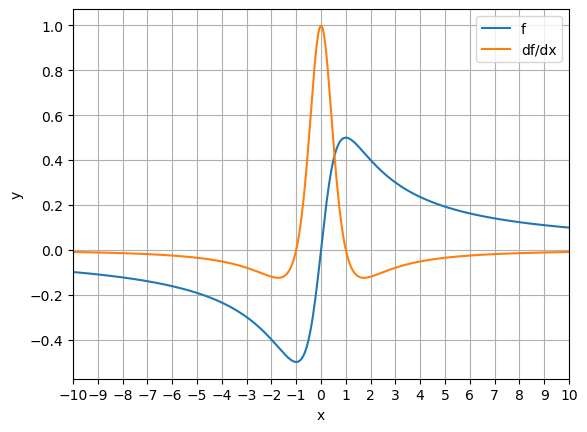

In [36]:
import numpy as np
import matplotlib.pyplot as plt

nplot = 400
a = -10
b = 10
 
x = np.linspace(a,b,nplot)
y = f(x)
dy = dfdx(x)

plt.plot(x,y,label='f')
plt.plot(x,dy,label='df/dx')
plt.legend(loc='upper right')
plt.xticks(np.arange(a, b+1, 1.0))
plt.xlim(a,b)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [37]:
x0 = 1.07
#x0 = 1.08
#x0 = 1.09

solApprox = Newton(f, dfdx, x0, 1.0e-4, debug=True)
print(solApprox)

16.908806073153887
33.936308866114594
67.9316028776399
135.8926535145931
271.8000253252568
543.6074091011637
1087.218497340497
2174.4388342391844
4348.878588256102
8697.7576364009
17395.51550274613
(17395.51550274613, 11)


In [44]:
def Newton(f, dfdx, x, eps1=1e-4, eps2=1e-4, maxit=20, debug=False):
    
    f_value = f(x)
    iteration_counter = 0
    
    err = 10*eps2
    
    while (abs(f_value) > eps1) and (err > eps2) and (iteration_counter < maxit):
        
        try:
            div = f_value/dfdx(x)
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x)
            sys.exit(1)     # Abort with error
        
        x = x - div
        
        err = abs(div/x)
        
        if debug:
            print(x, err)
            
        f_value = f(x)
        iteration_counter = iteration_counter + 1

    # Here, either a solution is found, or too many iterations
    if abs(f_value) > eps1 or err > eps2:
        iteration_counter = -1
    return x, iteration_counter

In [46]:
#x0 = 1.07
#x0 = 1.08
#x0 = 1.09
x0 = 0.5

solApprox = Newton(f, dfdx, x0, eps1=1.0e-4, eps2=1.0e-4, debug=True)
print(solApprox)

-0.33333333333333326 2.5000000000000004
0.08333333333333331 5.0
-0.0011655011655011677 72.49999999999986
3.166421473329087e-09 368082.49998925836
(3.166421473329087e-09, -1)


### Teorema da Convergência

Notas em sala de aula

## Método da Secante

Dado $x_0$ e $x_1$, consideremos as iterações
$$
x_k = x_{k-1} - \dfrac{f(x_{k-1})}{ \dfrac{f(x_{k-1}) - f(x_{k-2})}{x_{k-1} - x_{k-2}} },
$$
para $k = 2, 3, 4, \ldots$.

In [47]:
def secant(f, x0, x1, eps, debug=False):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x1) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x0)/(x1 - x0)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x)
            sys.exit(1)     # Abort with error
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        
        if debug:
            print(x)
        
        iteration_counter = iteration_counter + 1
    
    # Here, either a solution is found, or too many iterations
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [48]:
x = sym.symbols('x') 

f_expr = (x - 0.1)*(x - 2.1)*(x + 1.1) # symbolic expression for f(x) 

print(f_expr)

# turn f_expr and dfdx_expr into plain Python functions 
f = sym.lambdify([x], f_expr) 

(x - 2.1)*(x - 0.1)*(x + 1.1)


In [68]:
x0 = 3.0
x1 = 2.5
solApprox = secant(f, x0, x1, 1.0e-4, debug=True)
print(solApprox)

2.261490683229814
2.138887588207181
2.104536519194257
2.100139571920842
2.1000005129631965
(2.1000005129631965, 5)


### Exercício: Modificar a função `secant` para realizar o critério de convergência do erro relativo da iteração.